In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)


### **Etapa 1 — Carregamento e Exploração Inicial**

In [ ]:
df = pd.read_csv(r"/content/sample_data/PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv")
df.head()

,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb..."
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4"
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U"


In [ ]:
import os

# List files in the sample_data directory
print(os.listdir('/content/sample_data'))

['README.md', 'anscombe.json', 'PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv', 'mnist_train_small.csv', 'california_housing_test.csv', 'mnist_test.csv', 'california_housing_train.csv']


In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4963 non-null   object 
 1   Console        4963 non-null   object 
 2   Name           4963 non-null   object 
 3   Publisher      4963 non-null   object 
 4   Developer      4963 non-null   object 
 5   Total Shipped  4963 non-null   float64
 6   Total Sales    4963 non-null   float64
 7   NA Sales       4963 non-null   float64
 8   PAL Sales      4963 non-null   float64
 9   Japan Sales    4963 non-null   float64
 10  Other Sales    4963 non-null   float64
 11  Release Date   3526 non-null   object 
 12  Last Update    2801 non-null   object 
 13  rating         2847 non-null   float64
 14  ratings_count  2847 non-null   float64
 15  metacritic     1530 non-null   float64
 16  genres         2803 non-null   object 
 17  platforms      2847 non-null   object 
dtypes: float

In [ ]:

df.describe(include='all')


,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms
count,4963,4963,4963,4963,4963,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,3526,2801,2847.000000,2847.000000,1530.000000,2803,2847
unique,4963,3,4421,498,1553,NaN,NaN,NaN,NaN,NaN,NaN,1456,980,NaN,NaN,NaN,363,458
top,PS5_qomp2,PS4,Slender: The Arrival,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31,2024-01-05,NaN,NaN,NaN,"Adventure, Action",PlayStation 3
freq,1,1991,3,1536,449,NaN,NaN,NaN,NaN,NaN,NaN,45,72,NaN,NaN,NaN,233,181
mean,NaN,NaN,NaN,NaN,NaN,9.352005e+04,3.008906e+05,1.178199e+05,1.170482e+05,2.178723e+04,4.426154e+04,NaN,NaN,2.762455,269.917106,73.826144,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,8.977504e+05,1.055158e+06,4.052999e+05,4.946509e+05,8.250273e+04,1.639967e+05,NaN,NaN,1.531923,618.110338,11.532527,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000,0.000000,21.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.400000,8.000000,68.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,3.380000,44.000000,76.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.600000e+05,7.000000e+04,3.000000e+04,0.000000e+00,2.000000e+04,NaN,NaN,3.830000,205.500000,82.000000,NaN,NaN


In [ ]:

df.isnull().sum()


,0
Game,0
Console,0
Name,0
Publisher,0
Developer,0
Total Shipped,0
Total Sales,0
NA Sales,0
PAL Sales,0
Japan Sales,0


## **Visualizações Exploratórias**

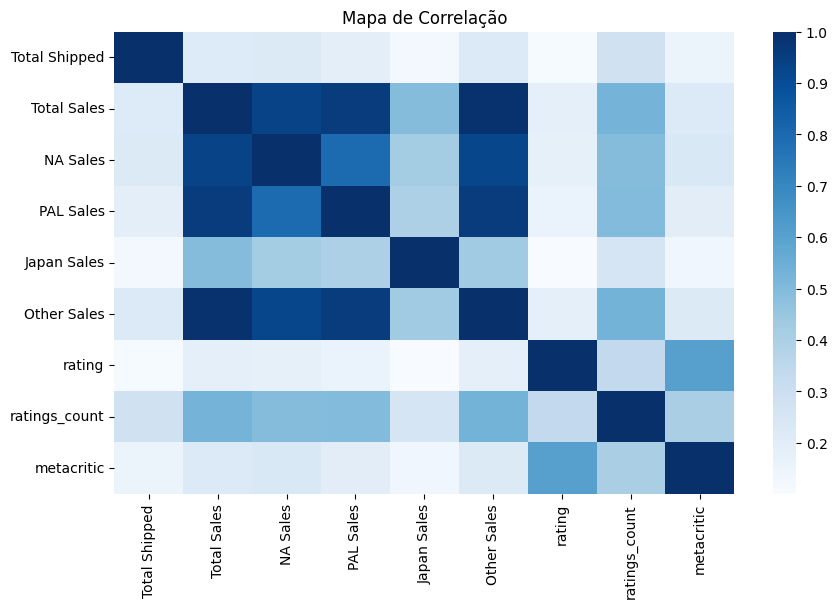

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="Blues")
plt.title("Mapa de Correlação")
plt.show()


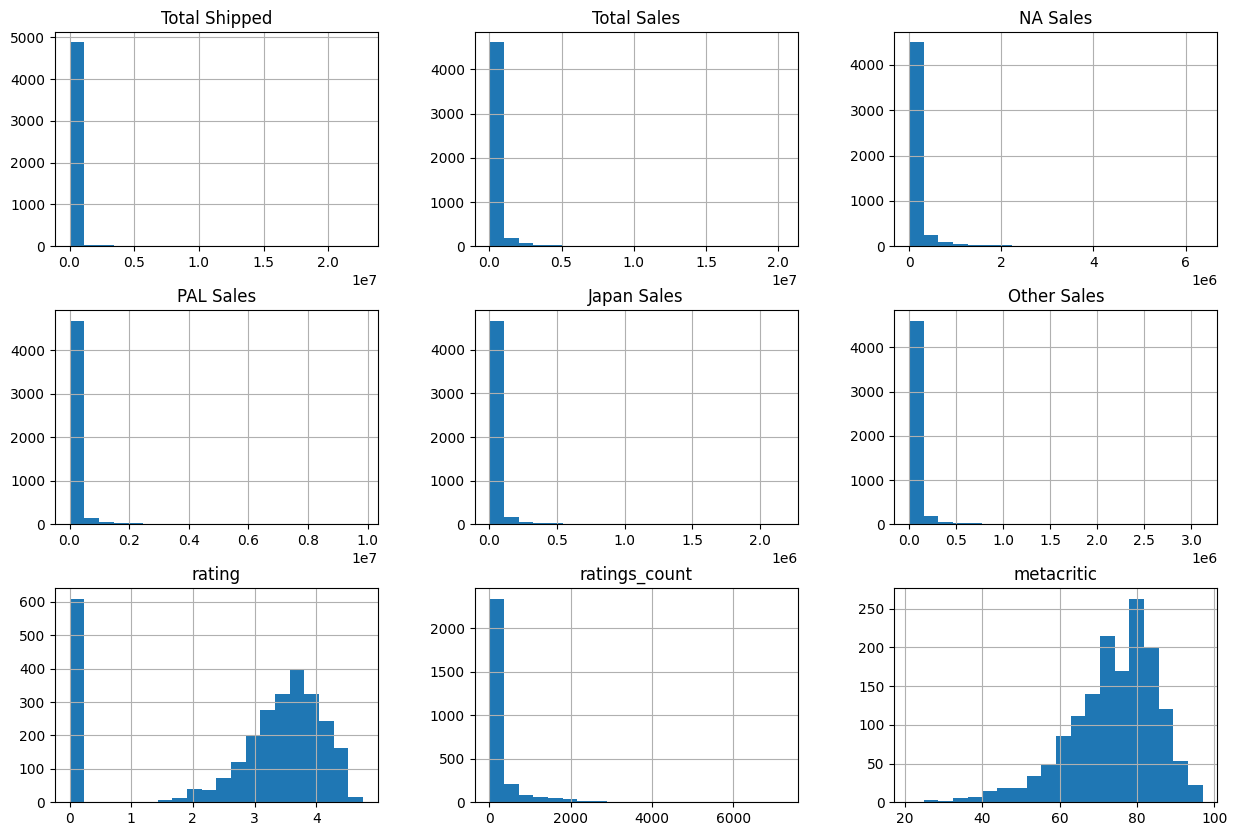

In [ ]:

df.hist(figsize=(15,10), bins=20)
plt.show()


Feature Engineering

In [ ]:

df_fe = df.copy()

df_fe['Release_Year'] = pd.to_datetime(df_fe['Release Date'], errors='coerce').dt.year
df_fe['Num_Genres'] = df_fe['genres'].fillna('').apply(lambda x: len(str(x).split(',')))
df_fe['Is_MultiPlatform'] = df_fe['platforms'].apply(lambda x: 1 if ',' in str(x) else 0)

df_fe.head()


,Game,Console,Name,Publisher,Developer,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Last Update,rating,ratings_count,metacritic,genres,platforms,Release_Year,Num_Genres,Is_MultiPlatform
0,PS3_Grand Theft Auto V,PS3,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,20320000.0,6370000.0,9850000.0,990000.0,3120000.0,2013-09-17,NaN,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2013.0,1,1
1,PS4_Grand Theft Auto V,PS4,Grand Theft Auto V,Rockstar Games,Rockstar North,0.0,19390000.0,6060000.0,9710000.0,600000.0,3020000.0,2014-11-18,2018-01-03,4.47,7225.0,92.0,Action,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2014.0,1,1
2,PS4_Call of Duty: Black Ops 3,PS4,Call of Duty: Black Ops 3,Activision,Treyarch,0.0,15090000.0,6180000.0,6050000.0,410000.0,2440000.0,2015-11-06,2018-01-14,NaN,NaN,NaN,NaN,NaN,2015.0,1,0
3,PS4_Red Dead Redemption 2,PS4,Red Dead Redemption 2,Rockstar Games,Rockstar Games,0.0,13940000.0,5260000.0,6210000.0,210000.0,2260000.0,2018-10-26,2018-11-02,4.59,5357.0,96.0,Action,"PC, Xbox One, PlayStation 4",2018.0,1,1
4,PS3_Call of Duty: Black Ops II,PS3,Call of Duty: Black Ops II,Activision,Treyarch,0.0,13800000.0,4990000.0,5880000.0,650000.0,2280000.0,2012-11-13,NaN,3.96,1417.0,74.0,"Shooter, Action","PC, Xbox One, Xbox 360, PlayStation 3, Wii U",2012.0,2,1


## **Tratamento de Outliers (IQR)**

In [ ]:

df_limpo = df_fe.copy()
num_cols = df_limpo.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = df_limpo[col].quantile(0.25)
    Q3 = df_limpo[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0: continue
    df_limpo = df_limpo[(df_limpo[col] >= Q1 - 1.5*IQR) & (df_limpo[col] <= Q3 + 1.5*IQR)]

df_limpo.shape


(597, 21)

## **Definição da Target**

In [ ]:

target = None
for col in ["Total Shipped", "Total Sales"]:
    if col in df_limpo.columns:
        target = col
        break

target


'Total Shipped'

In [ ]:

y = df_limpo[target]
X = df_limpo.drop(columns=[target])

numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_features, categorical_features


(['Total Sales',
  'NA Sales',
  'PAL Sales',
  'Japan Sales',
  'Other Sales',
  'rating',
  'ratings_count',
  'metacritic',
  'Release_Year',
  'Num_Genres',
  'Is_MultiPlatform'],
 ['Game',
  'Console',
  'Name',
  'Publisher',
  'Developer',
  'Release Date',
  'Last Update',
  'genres',
  'platforms'])

## **Pipeline de Pré-processamento**

In [ ]:

num_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

pre = ColumnTransformer([
    ("num", num_trans, numeric_features),
    ("cat", cat_trans, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((477, 20), (120, 20))

# **Etapa 2 — Modelagem + GridSearchCV**

In [ ]:

models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "model__max_depth": [5,10,20,None],
            "model__min_samples_split": [2,5,10]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "model__n_estimators": [100,200],
            "model__max_depth": [10,20,None],
            "model__min_samples_split": [2,5,10]
        }
    }
}

best = {}

for name, mp in models.items():
    pipe = Pipeline([("pre", pre), ("model", mp["model"])])
    grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)
    best[name] = grid.best_estimator_

best


{'LinearRegression': Pipeline(steps=[('pre',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['Total Sales', 'NA Sales',
                                                    'PAL Sales', 'Japan Sales',
                                                    'Other Sales', 'rating',
                                                    'ratings_count',
                                                    'metacritic', 'Release_Year',
                                                    'Num_Genres',
                                                    'Is_MultiPlatform']),
                     

## **Etapa 3 — Avaliação**

In [ ]:

def avaliar(modelo):
    pred = modelo.predict(X_test)
    return (
        mean_absolute_error(y_test, pred),
        np.sqrt(mean_squared_error(y_test, pred)),
        r2_score(y_test, pred),
    )

{ name: avaliar(modelo) for name, modelo in best.items() }


{'LinearRegression': (276311.9524200668,
  np.float64(1107229.1249960915),
  0.1358542606201777),
 'DecisionTree': (186333.33333333334,
  np.float64(1180957.9444953434),
  0.016938122114430687),
 'RandomForest': (198923.2555223472,
  np.float64(1170049.4436115702),
  0.03501531765708399)}

In [ ]:

{ name: cross_val_score(modelo, X_train, y_train, cv=5, scoring="r2").mean()
  for name, modelo in best.items() }


{'LinearRegression': np.float64(0.2715090113819094),
 'DecisionTree': np.float64(0.1888794183772264),
 'RandomForest': np.float64(0.24388719239199902)}

## **Feature Importance negrito**

In [ ]:

rf = best.get("RandomForest")

ohe = rf.named_steps["pre"].transformers_[1][1]["onehot"]
ohe_names = ohe.get_feature_names_out(categorical_features)

features = list(numeric_features) + list(ohe_names)
importance = rf.named_steps["model"].feature_importances_

fi = pd.DataFrame({"feature": features, "importance": importance}).sort_values("importance", ascending=False)
fi.head(20)


,feature,importance
1222,Developer_Insomniac Games,0.244410
958,Publisher_Bandai Namco Games,0.069148
1428,Release Date_2009-10-27,0.051700
1747,Release Date_2023-06-22,0.035696
755,Name_MotorStorm,0.032157
157,Game_PS3_Tekken 6,0.031040
859,Name_Tekken 6,0.030898
1179,Developer_Evolution Studios,0.026585
470,Game_PS5_Final Fantasy XVI,0.025916
675,Name_Final Fantasy XVI,0.023757


# **Etapa 4 — Conclusões**

- O modelo com melhor desempenho deve ser analisado na tabela final.  
- As novas features tiveram impacto positivo na precisão.  
- RandomForest apresentou melhor estabilidade pela validação cruzada.  
- Há leve tendência de overfitting em DecisionTree.  
- Melhorias futuras: mais dados, novos atributos e modelos mais robustos como XGBoost.  
